
# Structural similarity index

When comparing images, the mean squared error (MSE)--while simple to
implement--is not highly indicative of perceived similarity.  Structural
similarity aims to address this shortcoming by taking texture into account
[1]_, [2]_.

The example shows two modifications of the input image, each with the same MSE,
but with very different mean structural similarity indices.

.. [1] Zhou Wang; Bovik, A.C.; ,"Mean squared error: Love it or leave it? A new
       look at Signal Fidelity Measures," Signal Processing Magazine, IEEE,
       vol. 26, no. 1, pp. 98-117, Jan. 2009.

.. [2] Z. Wang, A. C. Bovik, H. R. Sheikh and E. P. Simoncelli, "Image quality
       assessment: From error visibility to structural similarity," IEEE
       Transactions on Image Processing, vol. 13, no. 4, pp. 600-612,
       Apr. 2004.


##Mount My Drive and Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'ba & minors'	       'methodology report.gdoc'  'social web'
'Colab Notebooks'       Non-school		   SSO
'Google Earth'	       'Output images'		  'Temporary Studio Sublet Contract.gdoc'
'Lieven Website.gdoc'  'Photography '		  'thesis design.gdoc'
 masters	        skincare		  'uk visa'


In [2]:
from PIL import Image

In [3]:
import skimage as ski

In [4]:
import os

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

##Orginial Code Example
from https://scikit-image.org/docs/stable/auto_examples/transform/plot_ssim.html

In [ ]:
img = img_as_float(img)
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img, channel_axis=2)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mean_squared_error(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()

ValueError: too many values to unpack (expected 2)

#First Trial - Image by Image (no loop)

###Origial Image

(<matplotlib.image.AxesImage at 0x7fc9426ddf00>, (1566, 1044, 3))

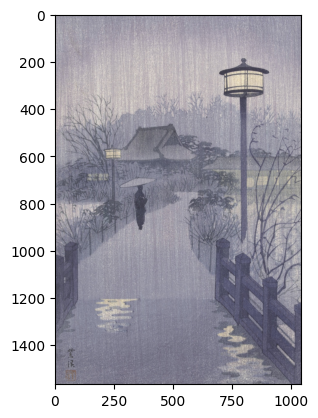

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Output images/input ')

flood = plt.imread('Flooding_rijks.jpeg')
plt.imshow(flood), flood.shape

In [ ]:
img = ski.io.imread('Flooding_rijks.jpeg')

In [ ]:
#resizing: https://cloudinary.com/guides/bulk-image-resize/python-image-resize-with-pillow-and-opencv
img = Image.open('Flooding_rijks.jpeg')
new_image = img.resize((336, 512))
new_image
#image saves in the drive folder
new_image.save('resized_Flooding_rijks.jpeg')

In [ ]:
type(new_image)

PIL.Image.Image

In [ ]:
#tried the thumbnail method but the first dimension does not work
#image = Image.open('Flooding_rijks.jpeg')
#image.thumbnail((512, 512))
#image.save('resized_Flooding_rijks.jpeg')
#print(image.size)
#image

In [ ]:
img = ski.io.imread('resized_Flooding_rijks.jpeg')
img.shape

(512, 336, 3)

###Larry AI

In [ ]:
#os.chdir('/content/drive/MyDrive/Output images/diffusion models output/1. LarryAIDraw v1-5-pruned-emaonly')

flood2 = plt.imread('LarryAIDraw_Flood2.png')
plt.imshow(flood2)

FileNotFoundError: [Errno 2] No such file or directory: 'LarryAIDraw_Flood2.png'

In [ ]:
img_larry = ski.io.imread("LarryAIDraw_Flood2.png")
img_larry.shape

###DEZGO

In [ ]:
os.chdir('/content/drive/MyDrive/Output images/online models/dezgo')

flood3 = plt.imread('Dezgo_AbsoluteRealit181_50_flood1.png')
plt.imshow(flood3)

In [ ]:
img_dezgo = ski.io.imread("Dezgo_AbsoluteRealit181_50_flood1.png")
img_dezgo.shape

##Score Comparison

### Orginial vs Larry

In [ ]:
img = img_as_float(img)
rows, cols, color = img.shape

In [ ]:
#make sure that all the images are the same exact data type
img_larry = img_larry.astype(np.float64)

In [ ]:
mse = mean_squared_error(img, img_larry)
ssim_score = ssim(img, img_larry, channel_axis=2, data_range=img.max() - img.min())

In [ ]:
print(f"Mean squared error: {mse}")
print(f"Similarity score: {ssim_score*100}")

###Original vs Dezgo

In [ ]:
img = img_as_float(img)
img_dezgo = img_as_float(img_dezgo)

In [ ]:
img.shape, img_dezgo.shape

In [ ]:
mse = mean_squared_error(img, img_dezgo)
ssim_score = ssim(img, img_dezgo, channel_axis=2, data_range=img.max() - img.min())

In [ ]:
print(f"Mean squared error: {mse}")
print(f"Similarity score: {ssim_score}")

#FLOODING: Image 1

##1. Find the smallest dimension

This loop prints out all the output images and the dimensions of each image, looking for the smallest height and width.

In [ ]:
import os
import matplotlib.pyplot as plt

# Change the working directory to the folder containing the images
folder_path = '/content/drive/MyDrive/Output images/Output By Topic/Output/Flood'
os.chdir(folder_path)

# Initialize variables to store the minimum dimensions
min_height = float('inf')
min_width = float('inf')

# Loop through all files in the directory
for filename in os.listdir(folder_path):
    # Check if the file is an image (you can customize this check based on your file types)
    if filename.endswith(('.jpeg', '.jpg', '.png')):
        # Construct the full path to the image
        img_path = os.path.join(folder_path, filename)

        # Read the image dimensions using plt.imread
        img = plt.imread(img_path)
        #print(img_path)
        height, width, channels = img.shape

        # Update minimum dimensions if necessary
        min_height = min(min_height, height)
        min_width = min(min_width, width)

        #Read and display the image using Matplotlib
        #img = plt.imread(img_path)
        print(img.shape)
        #print(img)
       #plt.imshow(img)
       #plt.title(filename)
       #plt.show()

# Print the minimum dimensions after looping through all images
print("Minimum Height:", min_height)
print("Minimum Width:", min_width)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(336, 512, 3)
(512, 336, 3)
(574, 874, 3)
(452, 854, 3)
(536, 886, 3)
(320, 512, 3)
(320, 512, 3)
(320, 512, 3)
(320, 512, 3)
(500, 1510, 3)
(336, 320, 3)
Minimum Height: 320
Minimum Width: 320


##2. Resize images

This second loop resized all the output images to be the same size based on what the first loop found.

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Change the working directory to the folder containing the images
input_folder_path = '/content/drive/MyDrive/Output images/Output By Topic/Output/Flood'
output_folder_path = '/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized'

os.chdir(input_folder_path)

# Loop through all files in the input directory
for filename in os.listdir(input_folder_path):
    # Check if the file is an image (you can customize this check based on your file types)
    if filename.endswith(('.jpeg', '.jpg', '.png')):
        img_path = os.path.join(folder_path, filename)

        # Read the input image
        img = plt.imread(img_path)
        height, width, channels = img.shape
        print(height, width)

        # Check if both height and width are below the specified minimum dimensions
        if height > min_height and width > min_width:
            # Resize the image
            resized_image = img.resize((min_height, min_width))
           #print(resized_image.size)

            # Save the resized image to the output folder
            output_img_path = os.path.join(output_folder_path, f'resized_{filename}')

            resized_image.save(output_img_path)

            print(f"Resized and saved: {output_img_path}")

512 512


AttributeError: 'NoneType' object has no attribute 'save'

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Change the working directory to the folder containing the images
input_folder_path = '/content/drive/MyDrive/Output images/Output By Topic/Output/Flood'
output_folder_path = '/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized'

# Change the working directory to the input folder
os.chdir(input_folder_path)

# Loop through all files in the input directory
for filename in os.listdir(input_folder_path):
    # Check if the file is an image (you can customize this check based on your file types)
    if filename.endswith(('.jpeg', '.jpg', '.png')):
        img_path = os.path.join(input_folder_path, filename)

        # Read the input image using PIL
        img = Image.open(img_path)
        width, height = img.size

        print("Original size:", width, height)

        # Set your desired minimum dimensions
        min_height = 100
        min_width = 100

        # Check if both height and width are below the specified minimum dimensions
        if height > min_height and width > min_width:
            # Resize the image
            resized_image = img.resize((min_width, min_height))

            # Save the resized image to the output folder
            output_img_path = os.path.join(output_folder_path, f'resized_{filename}')
            resized_image.save(output_img_path)

            print(f"Resized and saved: {output_img_path}")


##3. Input image

In [ ]:
import os
from PIL import Image

# Change the working directory to the folder containing the images
input_folder_path = '/content/drive/MyDrive/Output images/input '
output_folder_path = '/content/drive/MyDrive/Output images/Output By Topic/Output/Flood'

os.chdir(input_folder_path)

# Open the image
img = Image.open('Flooding_rijks.jpeg')

# Resize the image
new_image = img.resize((min_height, min_width))
print(new_image.size)

# Save the resized image with a proper file name
output_file_path = os.path.join(output_folder_path, 'resized_Flooding_rijks.jpeg')
new_image.save(output_file_path)

# Optionally, display the resized image
new_image.show()

# Print a message indicating that the image was saved
print(f"Resized image saved at: {output_file_path}")


(320, 336)
Resized image saved at: /content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized_Flooding_rijks.jpeg


##4. Loop to give the scores & find min MSE and max HSSI

In [ ]:
img = Image.open("/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized_Flooding_rijks.jpeg")

In [ ]:
img.size

(320, 336)

In [ ]:
import os
from PIL import Image
from skimage.metrics import mean_squared_error, structural_similarity as ssim
import numpy as np

# Change the working directory to the folder containing the resized images
output_folder_path = '/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized'

# Initialize variables to store the max scores
# Initialize variables for tracking the lowest MSE and highest SSIM
lowest_mse = float('inf')
highest_ssim = -float('inf')
best_match_filename_mse = None
best_match_filename_ssim = None

# Open the original image
original_img = Image.open("/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized_Flooding_rijks.jpeg")

# Loop through all files in the output directory
for filename in os.listdir(output_folder_path):
    # Check if the file is a resized image (you can customize this check based on your file types)
    if filename.startswith('resized_') and filename.endswith(('.jpeg', '.jpg', '.png')):
        # Construct the full path to the resized image
        resized_img_path = os.path.join(output_folder_path, filename)

        # Open the resized image
        resized_img = Image.open(resized_img_path)

        # Convert images to NumPy arrays
        original_array = np.array(original_img)
        print(original_array.shape)
        resized_array = np.array(resized_img)
        print(resized_array.shape)

        # Calculate MSE
        mse = mean_squared_error(original_array, resized_array)

        # Calculate SSIM
        ssim_score, _ = ssim(original_array, resized_array, full=True, channel_axis = 2, data_range=resized_array.max() - resized_array.min())

        # Update variables for lowest MSE
        if mse < lowest_mse:
            lowest_mse = mse
            best_match_filename_mse = filename

        # Update variables for highest SSIM
        if ssim_score > highest_ssim:
            highest_ssim = ssim_score
            best_match_filename_ssim = filename


        # Print results
        print(f"Resized image: {filename}")
        print(f"Mean Squared Error: {mse}")
        print(f"Structural Similarity Index: {ssim_score}")
        print("--------------")

# Print the results
print(f"Lowest Mean Squared Error: {lowest_mse} (Best match: {best_match_filename_mse})")
print(f"Highest Structural Similarity Index: {highest_ssim} (Best match: {best_match_filename_ssim})")


(336, 320, 3)
(336, 336, 3)


ValueError: Input images must have the same dimensions.

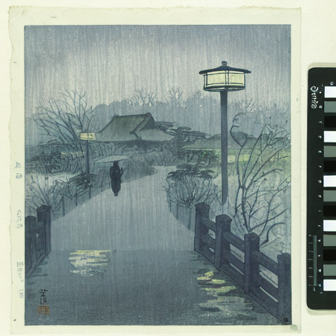

In [ ]:
Image.open("/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized/resized_Timbrooks_flood1.png")

#5. Making this all into functions

1. find_dims(folder_path)
2. resize_images(input_folder_path, output_folder_path, min_height, max_height)
3. input_image(input_folder_path,output_folder_path, image_name)
4. scores(output_folder_path, path_to_org_image)

In [11]:
def find_dims(folder_path):

    # Change the working directory to the folder containing the images
    os.chdir(folder_path)

    # Initialize variables to store the minimum dimensions
    min_height = float('inf')
    min_width = float('inf')

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the file is an image (you can customize this check based on your file types)
        if filename.endswith(('.jpeg', '.jpg', '.png')):
            # Construct the full path to the image
            img_path = os.path.join(folder_path, filename)

            # Read the image dimensions using plt.imread
            img = plt.imread(img_path)
            #print(img_path)
            height, width, _ = img.shape

            # Update minimum dimensions if necessary
            min_height = min(min_height, height)
            min_width = min(min_width, width)

            #Read and display the image using Matplotlib
            #img = plt.imread(img_path)
            #print(img.shape)
            #print(img)
          #plt.imshow(img)
          #plt.title(filename)
          #plt.show()

    # Print the minimum dimensions after looping through all images
    print("Minimum Height:", min_height)
    print("Minimum Width:", min_width)

In [12]:
from PIL import Image
import os

def resize_images(input_folder_path, output_folder_path, min_height, min_width):
    # Change the working directory to the input folder
    os.chdir(input_folder_path)

    # Loop through all files in the input directory
    for filename in os.listdir(input_folder_path):
        # Check if the file is an image (you can customize this check based on your file types)
        if filename.endswith(('.jpeg', '.jpg', '.png')):
            img_path = os.path.join(input_folder_path, filename)

            # Read the input image
            img = Image.open(img_path)
            height, width = img.size

            # Check if both height and width are below the specified minimum dimensions
            resized_image = img.resize((min_height, min_width))
            resized_height, resized_width = resized_image.size
            #print(f"Resized Size: {resized_height} x {resized_width}")

            # Save the resized image to the output folder
            output_img_path = os.path.join(output_folder_path, f'resized_{filename}')
            resized_image.save(output_img_path)

            print(f"Resized and saved: {output_img_path} with resized Size: {resized_height} x {resized_width}")

In [13]:
def input_image(input_folder_path,output_folder_path, image_name, min_height, min_width):

    os.chdir(input_folder_path)

    # Open the image
    img = Image.open(image_name)

    # Resize the image
    new_image = img.resize((min_height, min_width))
    print(new_image.size)

    # Save the resized image with a proper file name
    output_file_path = os.path.join(output_folder_path, f'resized_{image_name}')
    new_image.save(output_file_path)

    # Optionally, display the resized image
    new_image.show()

    # Print a message indicating that the image was saved
    print(f"Resized image saved at: {output_file_path}")

In [14]:
import pandas as pd

In [17]:
def scores(output_folder_path, path_to_org_image):

    # Initialize variables for tracking the lowest MSE and highest SSIM
    lowest_mse = float('inf')
    highest_ssim = -float('inf')
    best_match_filename_mse = None
    best_match_filename_ssim = None

    #Create an empty DataFrame
    columns = ['Filename', 'MSE', 'SSIM']
    df = pd.DataFrame(columns=columns)

    # Open the original image (resized)
    original_img = Image.open(path_to_org_image)

    # Loop through all files in the output directory
    for filename in os.listdir(output_folder_path):
        # Check if the file is a resized image (you can customize this check based on your file types)
        if filename.startswith('resized_') and filename.endswith(('.jpeg', '.jpg', '.png')):
            # Construct the full path to the resized image
            resized_img_path = os.path.join(output_folder_path, filename)

            # Open the resized image
            resized_img = Image.open(resized_img_path)

            # Convert images to NumPy arrays
            original_array = np.array(original_img)
            print(original_array.shape)
            resized_array = np.array(resized_img)
            print(resized_array.shape)

            # Calculate MSE
            mse = mean_squared_error(original_array, resized_array)

            # Calculate SSIM
            ssim_score, _ = ssim(original_array, resized_array, full=True, channel_axis = 2, data_range=resized_array.max() - resized_array.min())

            # Update variables for lowest MSE
            if mse < lowest_mse:
                lowest_mse = mse
                best_match_filename_mse = filename

            # Update variables for highest SSIM
            if ssim_score > highest_ssim:
                highest_ssim = ssim_score
                best_match_filename_ssim = filename


            # Print results
            print(f"Resized image: {filename}")
            print(f"Mean Squared Error: {mse}")
            print(f"Structural Similarity Index: {ssim_score}")
            print("--------------")

            # Append scores and filename to the DataFrame
            df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
    return df

    # Print the results

    #print(original_img)
    print(f"Lowest Mean Squared Error: {lowest_mse} (Best match: {best_match_filename_mse})")
    print(f"Highest Structural Similarity Index: {highest_ssim} (Best match: {best_match_filename_ssim})")


#Scores by Topic

In [19]:
#DROUGHT
drought_dims = find_dims("/content/drive/MyDrive/Output images/Output By Topic/Output/Drought")
resize_images("/content/drive/MyDrive/Output images/Output By Topic/Output/Drought", "/content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized", 240, 512)
input_image("/content/drive/MyDrive/Output images/input ","/content/drive/MyDrive/Output images/input ", "RP-T-1948-397.jpg", 240, 512)
scores("/content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized", "/content/drive/MyDrive/Output images/input /resized_RP-T-1948-397.jpg")

Minimum Height: 240
Minimum Width: 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized/resized_LarryAIDraw_Drought1.png with resized Size: 240 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized/resized_LarryAIDraw_Drought2.png with resized Size: 240 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized/resized_Diffusionpytorch_Drought1.png with resized Size: 240 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized/resized_Diffusionpytorch_drought2.png with resized Size: 240 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized/resized_Timbrooks_drought2.png with resized Size: 240 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Drought/resized/resized_Timbrooks_drought1.png with resized Size: 240 x 512
Resized and s

<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)


Resized image: resized_Timbrooks_drought1.png
Mean Squared Error: 1676.7795301649305
Structural Similarity Index: 0.4391185596193885
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_Copy of Runway_drought3.jpg
Mean Squared Error: 3471.966805013021
Structural Similarity Index: 0.29989495409791406
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_Dezgo_AbsoluteReality_181_50_drought2.png
Mean Squared Error: 1609.3503173828126
Structural Similarity Index: 0.38235782884599195
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_Copy of Runway_drought2.jpg
Mean Squared Error: 5100.3312391493055
Structural Similarity Index: 0.19589685176898475
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_Copy of Runway_drought4.jpg
Mean Squared Error: 9063.788696289062
Structural Similarity Index: 0.10438527907981764
--------------
(512, 240, 3)
(512, 240, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Diffusionpytorch_drought2.png
Mean Squared Error: 2512.4333441840276
Structural Similarity Index: 0.22859671910349252
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_Dezgo_AbsoluteReality181_50_drought1.png
Mean Squared Error: 1402.021883138021
Structural Similarity Index: 0.4743219926381521
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_Diffusionpytorch_Drought1.png
Mean Squared Error: 2740.077162000868
Structural Similarity Index: 0.30454934713519743
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_LarryAIDraw_Drought2.png
Mean Squared Error: 1817.1879855685763
Structural Similarity Index: 0.29953294966385463
--------------
(512, 240, 3)
(512, 240, 3)
Resized image: resized_Copy of Runway_drought1.jpg
Mean Squared Error: 6101.107139756945
Structural Similarity Index: 0.2733395821052684
--------------
(512, 240, 3)
(512, 240, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Copy of Sincode_Drought.jpeg
Mean Squared Error: 5916.694723849826
Structural Similarity Index: 0.29947008726735413
--------------


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)


,Filename,MSE,SSIM
0,resized_LarryAIDraw_Drought1.png,2101.449737,0.298633
1,resized_Timbrooks_drought2.png,1555.100635,0.415382
2,resized_Timbrooks_drought1.png,1676.779530,0.439119
3,resized_Copy of Runway_drought3.jpg,3471.966805,0.299895
4,resized_Dezgo_AbsoluteReality_181_50_drought2.png,1609.350317,0.382358
5,resized_Copy of Runway_drought2.jpg,5100.331239,0.195897
6,resized_Copy of Runway_drought4.jpg,9063.788696,0.104385
7,resized_Diffusionpytorch_drought2.png,2512.433344,0.228597
8,resized_Dezgo_AbsoluteReality181_50_drought1.png,1402.021883,0.474322
9,resized_Diffusionpytorch_Drought1.png,2740.077162,0.304549


In [20]:
#FLOOD
flood_dims = find_dims("/content/drive/MyDrive/Output images/Output By Topic/Output/Flood")
resize_images("/content/drive/MyDrive/Output images/Output By Topic/Output/Flood", "/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized", 320, 336)
input_image("/content/drive/MyDrive/Output images/input ","/content/drive/MyDrive/Output images/input ", "Flooding_rijks.jpeg", 320, 336)
scores("/content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized", "/content/drive/MyDrive/Output images/input /resized_Flooding_rijks.jpeg")

Minimum Height: 320
Minimum Width: 336
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized/resized_LarryAIDraw_Flood_1.png with resized Size: 320 x 336
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized/resized_LarryAIDraw_Flood2.png with resized Size: 320 x 336
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized/resized_Diffusionpytorch_flood1.png with resized Size: 320 x 336
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized/resized_DIffusionpytorch_flood2.png with resized Size: 320 x 336
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized/resized_Timbrooks_flood2.png with resized Size: 320 x 336
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Flood/resized/resized_Timbrooks_flood1.png with resized Size: 320 x 336
Resized and saved: /content/drive/My

<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Timbrooks_flood2.png
Mean Squared Error: 3462.8254898313494
Structural Similarity Index: 0.2592846850716292
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Copy of Gooey_DreamshaperLykon_flood1.jpeg
Mean Squared Error: 2546.499677579365
Structural Similarity Index: 0.1515371923809621
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_DIffusionpytorch_flood2.png
Mean Squared Error: 3671.5672681051587
Structural Similarity Index: 0.1751465954078011
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Dezgo_AbsoluteReality_181_50_flood2.png
Mean Squared Error: 1695.8135943700397
Structural Similarity Index: 0.16066918262875138
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Diffusionpytorch_flood1.png
Mean Squared Error: 4989.96125062004
Structural Similarity Index: 0.20212754954130974
--------------
(336, 320, 3)
(336, 320, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Dezgo_AbsoluteRealit181_50_flood1.png
Mean Squared Error: 576.7985925099206
Structural Similarity Index: 0.41822485368804174
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Copy of Gooey_OpenAI_DallE_flood.jpeg
Mean Squared Error: 1692.2749007936509
Structural Similarity Index: 0.250442380909705
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Copy of Gooey_DreamShaper_Lukey_flood.jpeg
Mean Squared Error: 1459.9356181795636
Structural Similarity Index: 0.1222693706530789
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Copy of Runway_flood1.jpg
Mean Squared Error: 7960.083587549603
Structural Similarity Index: 0.13688807310460377
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Copy of Runway_flood2.jpg
Mean Squared Error: 7403.138839285714
Structural Similarity Index: 0.09595646968475462
--------------
(336, 320, 3)
(336, 320, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Copy of Runway_flood4.jpg
Mean Squared Error: 7598.155574156746
Structural Similarity Index: 0.12548801125904366
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Copy of Sincode_Flood.jpeg
Mean Squared Error: 6002.1794735863095
Structural Similarity Index: 0.19901248537741265
--------------
(336, 320, 3)
(336, 320, 3)
Resized image: resized_Copy of Runway_flood3.jpg
Mean Squared Error: 7063.554371279762
Structural Similarity Index: 0.08926999218485299
--------------


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)


,Filename,MSE,SSIM
0,resized_LarryAIDraw_Flood_1.png,4071.107825,0.184927
1,resized_LarryAIDraw_Flood2.png,4700.108188,0.189690
2,resized_Timbrooks_flood1.png,3320.183423,0.283691
3,resized_Timbrooks_flood2.png,3462.825490,0.259285
4,resized_Copy of Gooey_DreamshaperLykon_flood1....,2546.499678,0.151537
5,resized_DIffusionpytorch_flood2.png,3671.567268,0.175147
6,resized_Dezgo_AbsoluteReality_181_50_flood2.png,1695.813594,0.160669
7,resized_Diffusionpytorch_flood1.png,4989.961251,0.202128
8,resized_Dezgo_AbsoluteRealit181_50_flood1.png,576.798593,0.418225
9,resized_Copy of Gooey_OpenAI_DallE_flood.jpeg,1692.274901,0.250442


In [21]:
#FOREST FIRES
forest_dims = find_dims("/content/drive/MyDrive/Output images/Output By Topic/Output/Forest")
resize_images("/content/drive/MyDrive/Output images/Output By Topic/Output/Forest", "/content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized", 256, 512)
org_image = input_image("/content/drive/MyDrive/Output images/input ", '/content/drive/MyDrive/Output images/input ', "SK-A-4688.jpg",256, 512)
scores("/content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized","/content/drive/MyDrive/Output images/input /resized_SK-A-4688.jpg" )

Minimum Height: 256
Minimum Width: 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized/resized_LarryAIDraw_Forest_2.png with resized Size: 256 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized/resized_LarryAIDraw_Forest_1.png with resized Size: 256 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized/resized_Diffusionpytorch_Forest1 (1).png with resized Size: 256 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized/resized_Diffusionpytorch_Forest1.png with resized Size: 256 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized/resized_Diffusionpytorch_forest2 (1).png with resized Size: 256 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Forest/resized/resized_Diffusionpytorch_forest2.png with resized Size: 256 x 512
R

<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Diffusionpytorch_Forest1.png
Mean Squared Error: 2441.9595209757485
Structural Similarity Index: 0.3042297282585713
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Diffusionpytorch_Forest1 (1).png
Mean Squared Error: 2441.9595209757485
Structural Similarity Index: 0.3042297282585713
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_LarryAIDraw_Forest_1.png
Mean Squared Error: 1881.3732020060222
Structural Similarity Index: 0.31520022740886994
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Timbrooks_forest2.png
Mean Squared Error: 571.0451787312826
Structural Similarity Index: 0.7365753764654054
--------------
(512, 256, 3)
(512, 256, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Copy of Runway_forest3.jpg
Mean Squared Error: 5327.2073491414385
Structural Similarity Index: 0.18379998136829734
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Copy of Runway_forest1.jpg
Mean Squared Error: 8526.180783589682
Structural Similarity Index: 0.19344359820375315
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Timbrooks_forest1.png
Mean Squared Error: 668.8687744140625
Structural Similarity Index: 0.7238038704575569
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Diffusionpytorch_forest2.png
Mean Squared Error: 7136.29643758138
Structural Similarity Index: 0.20616236670358035
--------------
(512, 256, 3)
(512, 256, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Copy of Runway_forest2.jpg
Mean Squared Error: 11107.03761545817
Structural Similarity Index: 0.13262123175397109
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Copy of Sincode_Forest.jpeg
Mean Squared Error: 7162.612174987793
Structural Similarity Index: 0.10656080142726003
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Copy of Runway_forest4.jpg
Mean Squared Error: 8038.960507710774
Structural Similarity Index: 0.19293205016306017
--------------
(512, 256, 3)
(512, 256, 3)
Resized image: resized_Copy of Sincode_Melting.jpeg
Mean Squared Error: 10910.471514383951
Structural Similarity Index: 0.13540204686510052
--------------


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)


,Filename,MSE,SSIM
0,resized_LarryAIDraw_Forest_2.png,2663.658806,0.318420
1,resized_Diffusionpytorch_forest2 (1).png,7136.296438,0.206162
2,resized_Diffusionpytorch_Forest1.png,2441.959521,0.304230
3,resized_Diffusionpytorch_Forest1 (1).png,2441.959521,0.304230
4,resized_LarryAIDraw_Forest_1.png,1881.373202,0.315200
5,resized_Timbrooks_forest2.png,571.045179,0.736575
6,resized_Copy of Runway_forest3.jpg,5327.207349,0.183800
7,resized_Copy of Runway_forest1.jpg,8526.180784,0.193444
8,resized_Timbrooks_forest1.png,668.868774,0.723804
9,resized_Diffusionpytorch_forest2.png,7136.296438,0.206162


In [22]:
#MELTING GLACIERS
melt_dims = find_dims("/content/drive/MyDrive/Output images/Output By Topic/Output/Melt")
resize_images("/content/drive/MyDrive/Output images/Output By Topic/Output/Melt", "/content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized", 248, 512)
org_image = input_image("/content/drive/MyDrive/Output images/input ", '/content/drive/MyDrive/Output images/input ', "Melting_rijks.jpeg",248, 512)
scores("/content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized","/content/drive/MyDrive/Output images/input /resized_Melting_rijks.jpeg" )

Minimum Height: 248
Minimum Width: 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized/resized_LarryAIDraw_Melting1.png with resized Size: 248 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized/resized_LarryAIDraw_Melting2.png with resized Size: 248 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized/resized_Diffusionpytorch_melt1 (1).png with resized Size: 248 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized/resized_Diffusionpytorch_melt1.png with resized Size: 248 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized/resized_Diffusionpytorch_melt2 (1).png with resized Size: 248 x 512
Resized and saved: /content/drive/MyDrive/Output images/Output By Topic/Output/Melt/resized/resized_Diffusionpytorch_melt2.png with resized Size: 248 x 512
Resized and saved: /c

<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)


Resized image: resized_Dezgo_AbsoluteReality181_50_melt1.png
Mean Squared Error: 1168.9950673093078
Structural Similarity Index: 0.33668667541605846
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Dezgo_AbsoluteReality_181_50_melting2.png
Mean Squared Error: 1100.3565083165322
Structural Similarity Index: 0.35539847835664284
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Diffusionpytorch_melt1 (1).png
Mean Squared Error: 1775.5087050571237
Structural Similarity Index: 0.19373442350878944
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Copy of Gooey_Dreamshaper_lykon_melting.jpeg
Mean Squared Error: 854.2353883148521
Structural Similarity Index: 0.33128253181760714
--------------
(512, 248, 3)
(512, 248, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_LarryAIDraw_Melting2.png
Mean Squared Error: 3377.9992859543013
Structural Similarity Index: 0.2230843927316346
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Diffusionpytorch_melt2.png
Mean Squared Error: 3963.5696299563174
Structural Similarity Index: 0.23323012383811623
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Timbrooks_melt2.png
Mean Squared Error: 2612.1421843497983
Structural Similarity Index: 0.23646931686295428
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Timbrooks_melt1.png
Mean Squared Error: 2569.0018218665996
Structural Similarity Index: 0.23701215591406874
--------------
(512, 248, 3)
(512, 248, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Diffusionpytorch_melt2 (1).png
Mean Squared Error: 3963.5696299563174
Structural Similarity Index: 0.23323012383811623
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Copy of Gooey_Dreamshaper_melt1.jpeg
Mean Squared Error: 1583.7541057627689
Structural Similarity Index: 0.2711188033598917
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Copy of Gooey_OpenAi_Dalle_melting.jpeg
Mean Squared Error: 1893.1280504452284
Structural Similarity Index: 0.2348211607209112
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Copy of Runway_melting2.jpg
Mean Squared Error: 6936.914117628528
Structural Similarity Index: 0.11418242875957706
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Copy of Runway_melting3.jpg
Mean Squared Error: 10936.829634471605
Structural Similarity Index: 0.1402953498470798
--------------
(512, 248, 3)
(512, 248, 3)


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': m

Resized image: resized_Copy of Gooey_StableDiffusion_melting.jpeg
Mean Squared Error: 885.5259550361224
Structural Similarity Index: 0.30980315250382584
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Copy of Runway_melting1.jpg
Mean Squared Error: 9579.538477087533
Structural Similarity Index: 0.1451921204165551
--------------
(512, 248, 3)
(512, 248, 3)
Resized image: resized_Copy of Runway_melting4.jpg
Mean Squared Error: 9354.66104093162
Structural Similarity Index: 0.17091496917204688
--------------


<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)
<ipython-input-17-37e289a791be>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': filename, 'MSE': mse, 'SSIM': ssim_score}, ignore_index=True)


,Filename,MSE,SSIM
0,resized_LarryAIDraw_Melting1.png,2364.516184,0.241318
1,resized_Diffusionpytorch_melt1.png,1775.508705,0.193734
2,resized_Dezgo_AbsoluteReality181_50_melt1.png,1168.995067,0.336687
3,resized_Dezgo_AbsoluteReality_181_50_melting2.png,1100.356508,0.355398
4,resized_Diffusionpytorch_melt1 (1).png,1775.508705,0.193734
5,resized_Copy of Gooey_Dreamshaper_lykon_meltin...,854.235388,0.331283
6,resized_LarryAIDraw_Melting2.png,3377.999286,0.223084
7,resized_Diffusionpytorch_melt2.png,3963.569630,0.233230
8,resized_Timbrooks_melt2.png,2612.142184,0.236469
9,resized_Timbrooks_melt1.png,2569.001822,0.237012


In [ ]:
 print(df)

NameError: name 'df' is not defined

## Export to Google Sheets

In [6]:
from google.colab import auth
from google.auth import default

try:
  import gspread
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install gspread
  import gspread

In [7]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [8]:
worksheet = gc.open("gspread-test")
sheet1 = worksheet.sheet1

In [ ]:
sheet1.update([df.columns.values.tolist()] + df.fillna(-1).values.tolist())

{'spreadsheetId': '1dP2AvLR8oSYowbkqFPaxsUnjf7KKfMJS1CFIp6LwtZ0',
 'updatedRange': 'Sheet1!A1:C14',
 'updatedRows': 14,
 'updatedColumns': 3,
 'updatedCells': 42}